<a href="https://colab.research.google.com/github/vdcmathieu/data-analysis-gpd-and-wh/blob/main/analyse_donnee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import des différentes librairies nécessaires.

In [5]:
# Import basics
from zipfile import ZipFile
from urllib.request import urlopen

# Import maths functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

# Import the Python machine learning libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import utils
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression

# Introduction

Le but de cette analyse est de traité la question : **L'argent fait-il le bonheur?**

Pour cela, de nombreux jeux de données, décrivant le *taux de bonheur* et le *taux de richesse* des pays dans le monde seront étudiés et mis en relation. 

Nous tenterons de répondre aux questions :
- L'argent fait-il le bonheur ou le bonheur fait-il l'argent ?
- Trop d'argent rent-il malheureux ?
- Y a-t-il un médian, une valeur pour laquelle on atteint le bonheur optimal ?

On pourrat s'attarder sur quelques questions annexes. Couvrant par exemple le rapport entre éducation et bonheur, et éducation et revenu.

# Les **données**

## World happiness Report

![World Happiness Report Logo](https://currentaffairs.adda247.com/wp-content/uploads/2020/03/21174153/ffff.jpg)

### Contexte

Le **World Happiness Report** est une enquête historique sur l'état du bonheur dans le monde qui classe 156 pays selon le degré de bonheur que leurs citoyens se perçoivent comme tels.

### Source

Les données sont issus de : The world happiness report.

> The World Happiness Report is a publication of the Sustainable Development Solutions Network, powered by data from the Gallup World Poll, and supported by the Ernesto Illy Foundation, illycaffè, Davines Group, Blue Chip Foundation, the William, Jeff, and Jennifer Gross Family Foundation, and Unilever’s largest ice cream brand Wall’s.

> The World Happiness Report was written by a group of independent experts acting in their personal capacities. Any views expressed in this report do not necessarily reflect the views of any organization, agency or program of the United Nations.

### Contenu

#### Qu'est-ce que la dystopie ?

La dystopie est un pays imaginaire qui compte les personnes les moins heureuses du monde. L'objectif de la création de la dystopie est de disposer d'un point de référence permettant de comparer favorablement tous les pays (aucun pays n'obtient de meilleurs résultats que la dystopie) en ce qui concerne chacune des six variables clés, ce qui permet à chaque sous-barre d'avoir une largeur positive (ou nulle, dans six cas). Les scores les plus faibles observés pour les six variables clés caractérisent donc la dystopie. Comme la vie serait très désagréable dans un pays où les revenus, l'espérance de vie, la générosité, la corruption, la liberté et le soutien social sont les plus faibles au monde, on l'appelle "dystopie", par opposition à l'utopie.

#### Quels sont les résidus ?

Les résidus, ou composantes inexpliquées, diffèrent pour chaque pays, reflétant la mesure dans laquelle les six variables sur-expliquent ou sous-expliquent les évaluations moyennes de la vie pour 2016-2018. Ces résidus ont une valeur moyenne d'environ zéro sur l'ensemble des pays. La figure 2.7 montre le résidu moyen pour chaque pays si l'équation du tableau 2.1 est appliquée aux données moyennes 2016-2018 pour les six variables dans ce pays. Nous combinons ces résidus avec l'estimation des évaluations de la vie en Dystopie, de sorte que la barre combinée aura toujours des valeurs positives. Comme le montre le tableau 2.7, bien que certains résidus d'évaluation de la vie soient assez importants, dépassant parfois un point sur l'échelle de 0 à 10, ils sont toujours beaucoup plus faibles que la valeur calculée en dystopie, où la vie moyenne est évaluée à 1,88 sur l'échelle de 0 à 10. Le tableau 7 de l'annexe statistique en ligne 1 du chapitre 2 place le bloc Dystopie plus résiduel sur le côté gauche, et trace également la ligne Dystopie, ce qui permet de comparer facilement les signes et les tailles des résidus dans différents pays.

#### Pourquoi utilisons-nous ces six facteurs pour expliquer les évaluations de la vie ?

Les variables utilisées reflètent ce qui a été largement reconnu dans la littérature de recherche comme étant important pour expliquer les différences d'évaluation de la vie au niveau national. Certaines variables importantes, telles que le chômage ou l'inégalité, n'apparaissent pas parce que des données internationales comparables ne sont pas encore disponibles pour l'échantillon complet des pays. Les variables sont destinées à illustrer des lignes de corrélation importantes plutôt qu'à refléter des estimations causales nettes, puisque certaines des données proviennent des mêmes sources d'enquête, que certaines sont corrélées entre elles (ou avec d'autres facteurs importants pour lesquels nous ne disposons pas de mesures), et que dans plusieurs cas, il est probable qu'il existe des relations à double sens entre les évaluations de la vie et les variables choisies (par exemple, les personnes en bonne santé sont globalement plus heureuses, mais comme l'a démontré le chapitre 4 du Rapport sur le bonheur dans le monde 2013, les personnes plus heureuses sont globalement en meilleure santé). Dans l'annexe statistique 1 du Rapport sur le bonheur dans le monde 2018, nous avons évalué l'importance éventuelle de l'utilisation de données explicatives provenant des mêmes personnes dont les évaluations de vie sont expliquées. Pour ce faire, nous avons divisé les échantillons de manière aléatoire en deux groupes et utilisé les valeurs moyennes, par exemple la liberté, recueillies auprès d'un groupe pour expliquer les évaluations de la vie de l'autre groupe. Cela a réduit les effets, mais très légèrement (par exemple 2 à 3 %), ce qui nous assure que l'utilisation de données provenant des mêmes personnes n'affecte pas sérieusement les résultats.

### Import des données


In [6]:
worldHapinessReport2008To2018 = pd.read_excel('https://query.data.world/s/qkokt7fok6xfu5cpevvynxfao7zlqx') #world happiness report from 2008 to 2018

In [7]:
worldHapinessReport2008To2018

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1700,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1701,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,0.208555,0.699344,-0.900649,-1.374650,2.776363,0.743257,NaN,0.432,0.596690,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1702,Zimbabwe,2017,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,0.224051,0.682647,-0.988153,-1.350867,2.656848,0.730244,NaN,0.432,0.581484,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942


## World Development Indicators

![The World Bank](https://www.gavi.org/sites/default/files/about/operating/world-bank-logo.gif)

### Contexte

> The World Development Indicators is a compilation of relevant, high-quality, and internationally comparable statistics about global development and the fight against poverty. The database contains 1,600 time series indicators for 217 economies and more than 40 country groups, with data for many indicators going back more than 50 years.

### Source

Les données sont issus de la basse de donnée de la [Banque Mondiale](https://datatopics.worldbank.org/world-development-indicators/).

### Contenue

### Import des données

_(à noté : ça prends énormément de temps à run vu que le jeu de donnée est énorme (60 Mo). Also : Il y a énormémément, mais genre énormément de donnée, je te conseille d'aller sur le site avant pour jeter un coup d'oeil et trouvé=er les trucs intéressants.)_

In [8]:
WDIData = pd.read_csv('/content/drive/MyDrive/uni/data-analyse-donnee-wbi/WDI_csv/WDIData.csv')
WDICountry = pd.read_csv('https://raw.githubusercontent.com/vdcmathieu/data-analysis-gpd-and-wh/main/data/WDI_csv/WDICountry.csv')

In [9]:
WDIData

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.702495,74.944860,76.258066,77.120464,78.094440,79.062000,79.851681,80.570536,81.210886,81.809630,82.368101,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.297851,78.302779,78.980861,78.479364,80.023047,77.999111,79.306311,79.537184,80.574728,84.621206,82.926878,83.644992,84.270921,86.959991,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.173305,56.103435,57.350189,57.353298,59.528339,60.383730,62.112010,63.261702,61.626342,64.908930,66.246450,64.850152,64.471295,66.612006,72.367301,68.805997,72.135831,70.506461,75.816160,75.958878,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.574429,93.022834,93.321986,93.601289,93.556321,95.141707,94.939743,95.712972,95.065438,96.290866,96.466418,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380155,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.300000,NaN,NaN,NaN,NaN,NaN,NaN,24.300000,NaN,NaN,NaN,NaN,16.900000,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN
380156,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,NaN,4.600000,NaN,NaN,NaN,NaN,NaN,NaN,4.600000,NaN,NaN,NaN,NaN,3.900000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.4,NaN,NaN
380157,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.1,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,28.700000,NaN,NaN,NaN,NaN,NaN,NaN,33.600000,NaN,NaN,30.100000,NaN,30.500000,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,33.7,NaN,NaN
380158,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,

In [10]:
WDICountry

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,BPM6,NaN,General trade system,NaN,Enhanced General Data Dissemination System (e-...,2010,NaN,NaN,Yes,NaN,NaN,2016.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,NaN,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,BPM6,Actual,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2017.0,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,2002,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,NaN,BPM6,Actual,Special trade system,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2017.0,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),IBRD,NaN,Country uses the 2008 System of National Accou...,NaN,NaN,BPM6,Actual,Special trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,2011,"Demographic and Health Survey, 2017/18",Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2017.0,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income,AD,2010,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,NaN,General trade system,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,XKX,Kosovo,Kosovo,Republic of Kosovo,XK,Euro,NaN,Europe & Central Asia,Upper middle income,XK,Original chained constant price data are resca...,2008,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,BPM6,Actual,NaN,NaN,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2013/14","Expenditure survey/budget survey (ES/BS), 2015",NaN,2014,NaN,NaN,NaN
259,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,NaN,Middle East & North Africa,Low income,RY,1990,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,1990–96,NaN,BPM5 (Converted into BPM6 by IMF),Estimate,Special trade system,NaN,Enhanced General Data Dissemination System (e-...,2004,"Demographic and Health Survey, 2013","Expenditure survey/budget survey (ES/BS), 2014",NaN,NaN,2012.0,2017.0,NaN
260,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,2010,2010,Value added at basic prices (VAB),IBRD,NaN,Country uses the 2008 System of National Accou...,NaN,NaN,BPM6,A

# Nettoyage des données

Ici les données seront nettoyer pour permettre une meilleure analyse par la suite.

## World Happiness Report

On supprime les colonnes inutiles et ajuste le titre de la colonne *Country name* pour matcher celle du WDI.

In [11]:
whr = worldHapinessReport2008To2018[['Country name', 'Year', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Confidence in national government']]
whr = whr.rename(columns={'Country name': 'Country Name'})
whr

,Country Name,Year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
0,Afghanistan,2008,0.450662,50.799999,0.718114,0.177889,0.881686,0.612072
1,Afghanistan,2009,0.552308,51.200001,0.678896,0.200178,0.850035,0.611545
2,Afghanistan,2010,0.539075,51.599998,0.600127,0.134353,0.706766,0.299357
3,Afghanistan,2011,0.521104,51.919998,0.495901,0.172137,0.731109,0.307386
4,Afghanistan,2012,0.520637,52.240002,0.530935,0.244273,0.775620,0.435440
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,0.765839,52.380001,0.642034,-0.048634,0.820217,0.566209
1700,Zimbabwe,2015,0.735800,53.799999,0.667193,-0.097354,0.810457,0.590012
1701,Zimbabwe,2016,0.768425,54.400002,0.732971,-0.068105,0.723612,0.699344
1702,Zimbabwe,2017,0.754147,55.000000,0.752826,-0.069670,0.751208,0.682647


## WDI Data

On filtre les lignes pour récupérer seulement les lignes avec le PIB par habitants.
On filtre les colonnes pour récupérer seulement le nom du pays et le PIB par habitant de 2008 à 2018.

In [12]:
wdid_filtered = WDIData.loc[WDIData['Indicator Code'] == 'NY.GDP.PCAP.CD']
gpd_per_country_per_year = wdid_filtered[['Country Name', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']]
gpd_per_country_per_year

,Country Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
474,Arab World,6146.391727,5176.528324,5934.290684,6867.692047,7465.151651,7519.808260,7457.461109,6387.660615,6097.239025,6102.211067,6603.351190
1914,Caribbean small states,10059.833152,8411.007673,9086.894793,9762.053463,10017.383589,10140.165942,10202.274766,9939.801206,9384.914524,9557.517493,9982.268089
3354,Central Europe and the Baltics,14576.991411,12293.391978,12576.041840,13889.385777,13015.828716,13718.097749,14161.907303,12493.713822,12792.514115,14198.129857,15966.668337
4794,Early-demographic dividend,2595.773601,2460.736569,2944.925795,3252.888306,3362.382791,3373.306680,3444.087951,3297.405256,3328.524055,3548.288051,3582.002227
6234,East Asia & Pacific,6498.487645,6647.743114,7697.992805,8861.458466,9420.497882,9466.235452,9703.284026,9598.278555,9857.980865,10467.702192,11316.760450
...,...,...,...,...,...,...,...,...,...,...,...,...
373434,Virgin Islands (U.S.),39207.003755,38771.274388,40043.190166,39144.165774,37849.728721,34819.147755,33573.097030,34797.140470,35931.541252,35938.024388,NaN
374874,West Bank and Gaza,1857.890515,1970.182963,2354.125987,2695.193853,2834.021525,3060.312389,3046.821798,2967.851747,3074.291152,3254.485887,3198.866644
376314,"Yemen, Rep.",1229.246843,1116.084594,1334.784845,1374.621285,1446.536354,1607.152365,1673.146354,1395.439633,1033.733043,882.395759,968.159048
377754,Zambia,1394.000608,1159.907762,1489.459306,1672.908251,1763.072733,1878.907001,1763.057298,1337.796110,1280.578898,1534.865371,1556.334482


On utilise la fonction Melt pour faire pivoter le tableau et passer les années en ligne.
On a donc trois colonnes : *Country Name*, *Year* et *GPD*.

In [13]:
gpd_per_country_per_year = gpd_per_country_per_year.melt(id_vars=['Country Name'],
                     var_name='Year',
                     value_name='GPD')
gpd_per_country_per_year = gpd_per_country_per_year.sort_values(by=['Country Name', 'Year'])
gpd_per_country_per_year

,Country Name,Year,GPD
47,Afghanistan,2008,364.660745
311,Afghanistan,2009,438.076034
575,Afghanistan,2010,543.303042
839,Afghanistan,2011,591.162759
1103,Afghanistan,2012,641.871479
...,...,...,...
1847,Zimbabwe,2014,1434.899340
2111,Zimbabwe,2015,1445.071062
2375,Zimbabwe,2016,1464.583529
2639,Zimbabwe,2017,1548.170056


On passe la colonne *Year* en numérique (*INT*).

In [14]:
gpd_per_country_per_year.Year = gpd_per_country_per_year.Year.astype(str).astype(int)

## WDI Country

On récupère la région et le groupe de revenu de chaque pays en filtrant *WDICountry*.

In [15]:
CountryName_Region_IncomeGroup = WDICountry[['Table Name', 'Region', 'Income Group']]
CountryName_Region_IncomeGroup = CountryName_Region_IncomeGroup.rename(columns={'Table Name': 'Country Name'})
CountryName_Region_IncomeGroup

,Country Name,Region,Income Group
0,Aruba,Latin America & Caribbean,High income
1,Afghanistan,South Asia,Low income
2,Angola,Sub-Saharan Africa,Lower middle income
3,Albania,Europe & Central Asia,Upper middle income
4,Andorra,Europe & Central Asia,High income
...,...,...,...
258,Kosovo,Europe & Central Asia,Upper middle income
259,"Yemen, Rep.",Middle East & North Africa,Low income
260,South Africa,Sub-Saharan Africa,Upper middle income
261,Zambia,Sub-Saharan Africa,Lower middle income


Fusion de WDI Data, WDI Country, et World Happinnes Report.

On fusionne nos trois data frame en un utilisant *Country Name* comme colonne fixe.
Puis, on paramètre *Country Name* comme index de notre nouveau Data Frame.

In [16]:
inter = pd.merge(gpd_per_country_per_year, whr, on=['Country Name','Year'])
result = pd.merge(inter, CountryName_Region_IncomeGroup, on=['Country Name']).set_index('Country Name')
result

,Year,GPD,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,Region,Income Group
Country Name,,,,,,,,,,
Afghanistan,2008,364.660745,0.450662,50.799999,0.718114,0.177889,0.881686,0.612072,South Asia,Low income
Afghanistan,2009,438.076034,0.552308,51.200001,0.678896,0.200178,0.850035,0.611545,South Asia,Low income
Afghanistan,2010,543.303042,0.539075,51.599998,0.600127,0.134353,0.706766,0.299357,South Asia,Low income
Afghanistan,2011,591.162759,0.521104,51.919998,0.495901,0.172137,0.731109,0.307386,South Asia,Low income
Afghanistan,2012,641.871479,0.520637,52.240002,0.530935,0.244273,0.775620,0.435440,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,2014,1434.899340,0.765839,52.380001,0.642034,-0.048634,0.820217,0.566209,Sub-Saharan Africa,Lower middle income
Zimbabwe,2015,1445.071062,0.735800,53.799999,0.667193,-0.097354,0.810457,0.590012,Sub-Saharan Africa,Lower middle income
Zimbabwe,2016,1464.583529,0.768425,54.400002,0.732971,-0.068105,0.723612,0.699344,Sub-Saharan Africa,Lower middle income


In [17]:
result = result.dropna()

Le nétoyage est fini. On a un data frame exploitable avec toutes les données souhaités. Celui-ci est sauvegardé sous la variable *result*.

#Analyse

## Corrélation des différents indicateurs

On regarde la corrélation entre les différents indictateurs et le PIB par habitant (ici *GPD*).

On rapelle que la corrélation entre deux variables donne un indicateur compris entre -1 et 1.

> Generally, a value of r greater than 0.7 is considered a strong correlation. Anything between 0.5 and 0.7 is a moderate correlation, and anything less than 0.4 is considered a weak or no correlation.

### Méthode de Pearson

Le coefficient de corrélation de pearson mesure une corrélation linéaire entre deux variables.

In [18]:
result.corr()

,Year,GPD,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
Year,1.000000,0.024700,0.019184,0.130199,0.200487,-0.040741,-0.075458,0.012712
GPD,0.024700,1.000000,0.546413,0.649330,0.456044,0.257579,-0.662762,0.031616
Social support,0.019184,0.546413,1.000000,0.639122,0.446782,0.097323,-0.263659,-0.169112
Healthy life expectancy at birth,0.130199,0.649330,0.639122,1.000000,0.417201,0.046182,-0.372509,-0.181830
Freedom to make life choices,0.200487,0.456044,0.446782,0.417201,1.000000,0.332987,-0.484846,0.400471
Generosity,-0.040741,0.257579,0.097323,0.046182,0.332987,1.000000,-0.293902,0.285425
Perceptions of corruption,-0.075458,-0.662762,-0.263659,-0.372509,-0.484846,-0.293902,1.000000,-0.422371
Confidence in national government,0.012712,0.031616,-0.169112,-0.181830,0.400471,0.285425,-0.422371,1.000000


On observe que la variable *Perception of corruption* et *Healthy life expectancy at birth* sont fortement correlé avec le PIB par habitants. Respectivement, -0.62 et 0.63.

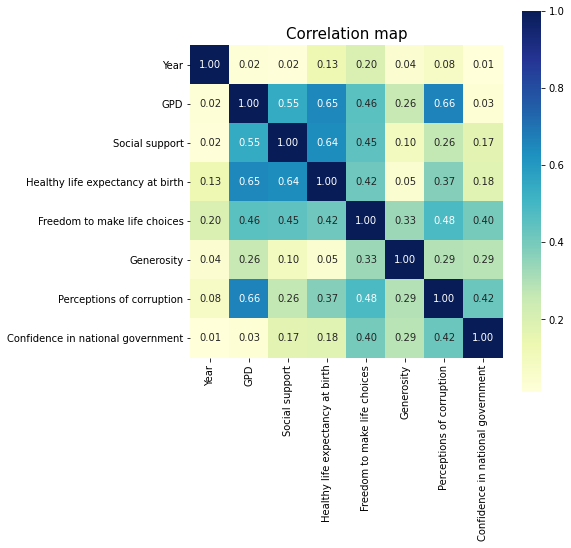

In [19]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(result.corr().abs(), annot=True, fmt=".2f", square=True, cmap="YlGnBu")
plt.title("Correlation map", fontsize=15)
plt.show()

### Méthode de Spearman

La corrélation de Spearman est étudiée lorsque deux variables statistiques semblent corrélées sans que la relation entre les deux variables soit de type affine. Elle consiste à trouver un coefficient de corrélation, non pas entre les valeurs prises par les deux variables mais entre les rangs de ces valeurs.

On noterra qu'il existe aussi la méthode de Kendall pour obtenir une corrélation par rang.

In [20]:
result.corr(method="spearman")

,Year,GPD,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
Year,1.000000,0.049574,0.012385,0.126407,0.189281,-0.043848,-0.108503,0.012320
GPD,0.049574,1.000000,0.781141,0.880694,0.447781,0.003427,-0.306570,-0.208422
Social support,0.012385,0.781141,1.000000,0.699072,0.507892,0.128263,-0.275916,-0.147477
Healthy life expectancy at birth,0.126407,0.880694,0.699072,1.000000,0.454713,0.063910,-0.299819,-0.207528
Freedom to make life choices,0.189281,0.447781,0.507892,0.454713,1.000000,0.353069,-0.488980,0.392262
Generosity,-0.043848,0.003427,0.128263,0.063910,0.353069,1.000000,-0.228065,0.285354
Perceptions of corruption,-0.108503,-0.306570,-0.275916,-0.299819,-0.488980,-0.228065,1.000000,-0.465729
Confidence in national government,0.012320,-0.208422,-0.147477,-0.207528,0.392262,0.285354,-0.465729,1.000000


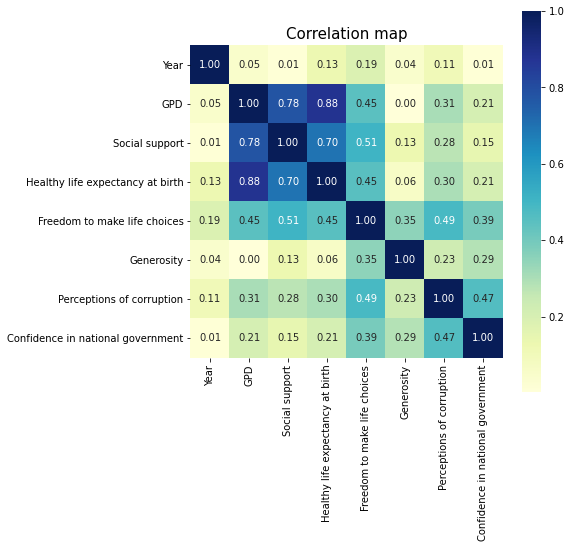

In [21]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(result.corr(method="spearman").abs(), annot=True, fmt=".2f", square=True, cmap="YlGnBu")
plt.title("Correlation map", fontsize=15)
plt.show()

## Répartition des pays par PIB par habitants 

## Global

### Années cummulées

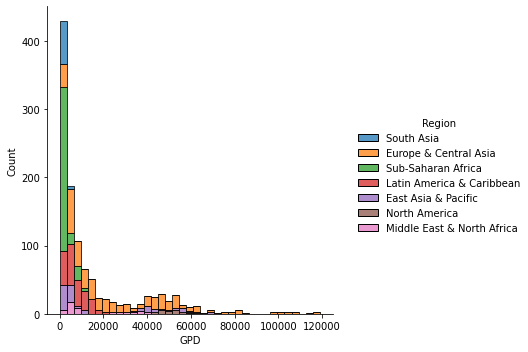

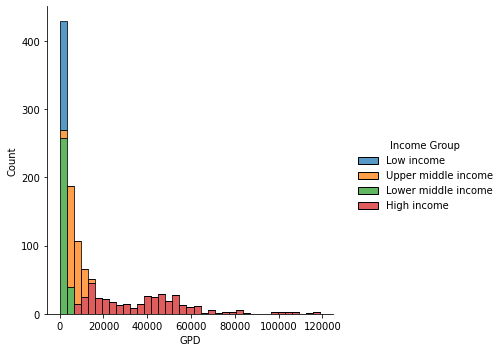

In [22]:
sns.displot(result, x="GPD", kde=False, hue="Region", multiple="stack")
sns.displot(result, x="GPD", kde=False, hue="Income Group", multiple="stack")

### Par années

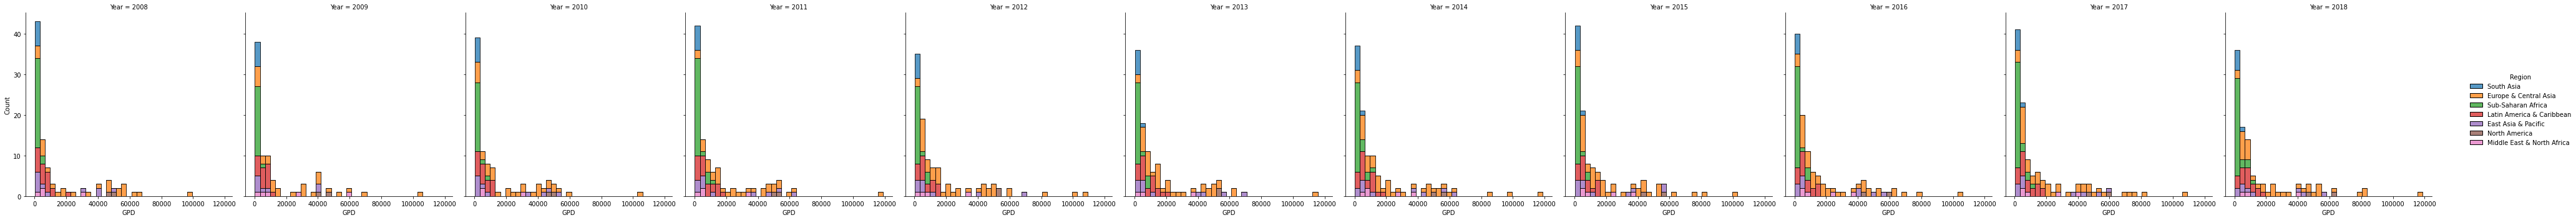

In [23]:
sns.displot(result, x="GPD", kde=False, hue="Region", multiple="stack", col="Year")

## Par région

### Années cummulées

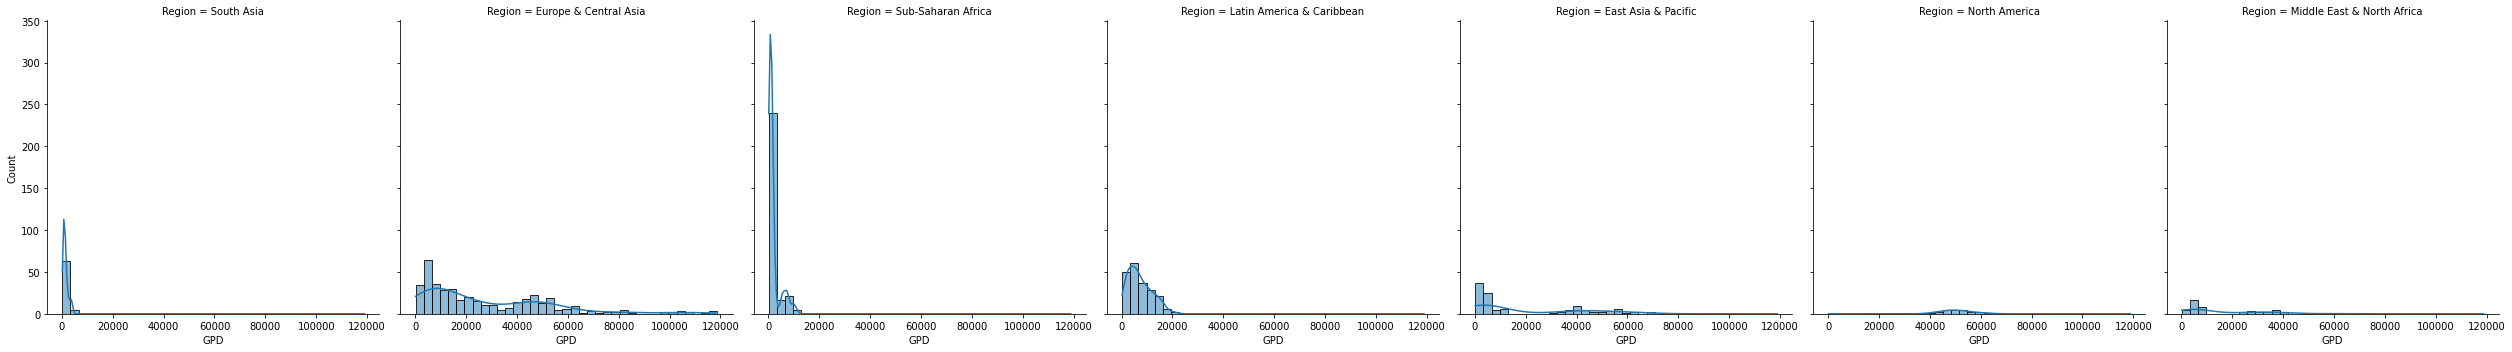

In [24]:
sns.displot(result, x="GPD", kde=True, col="Region")

### Par années

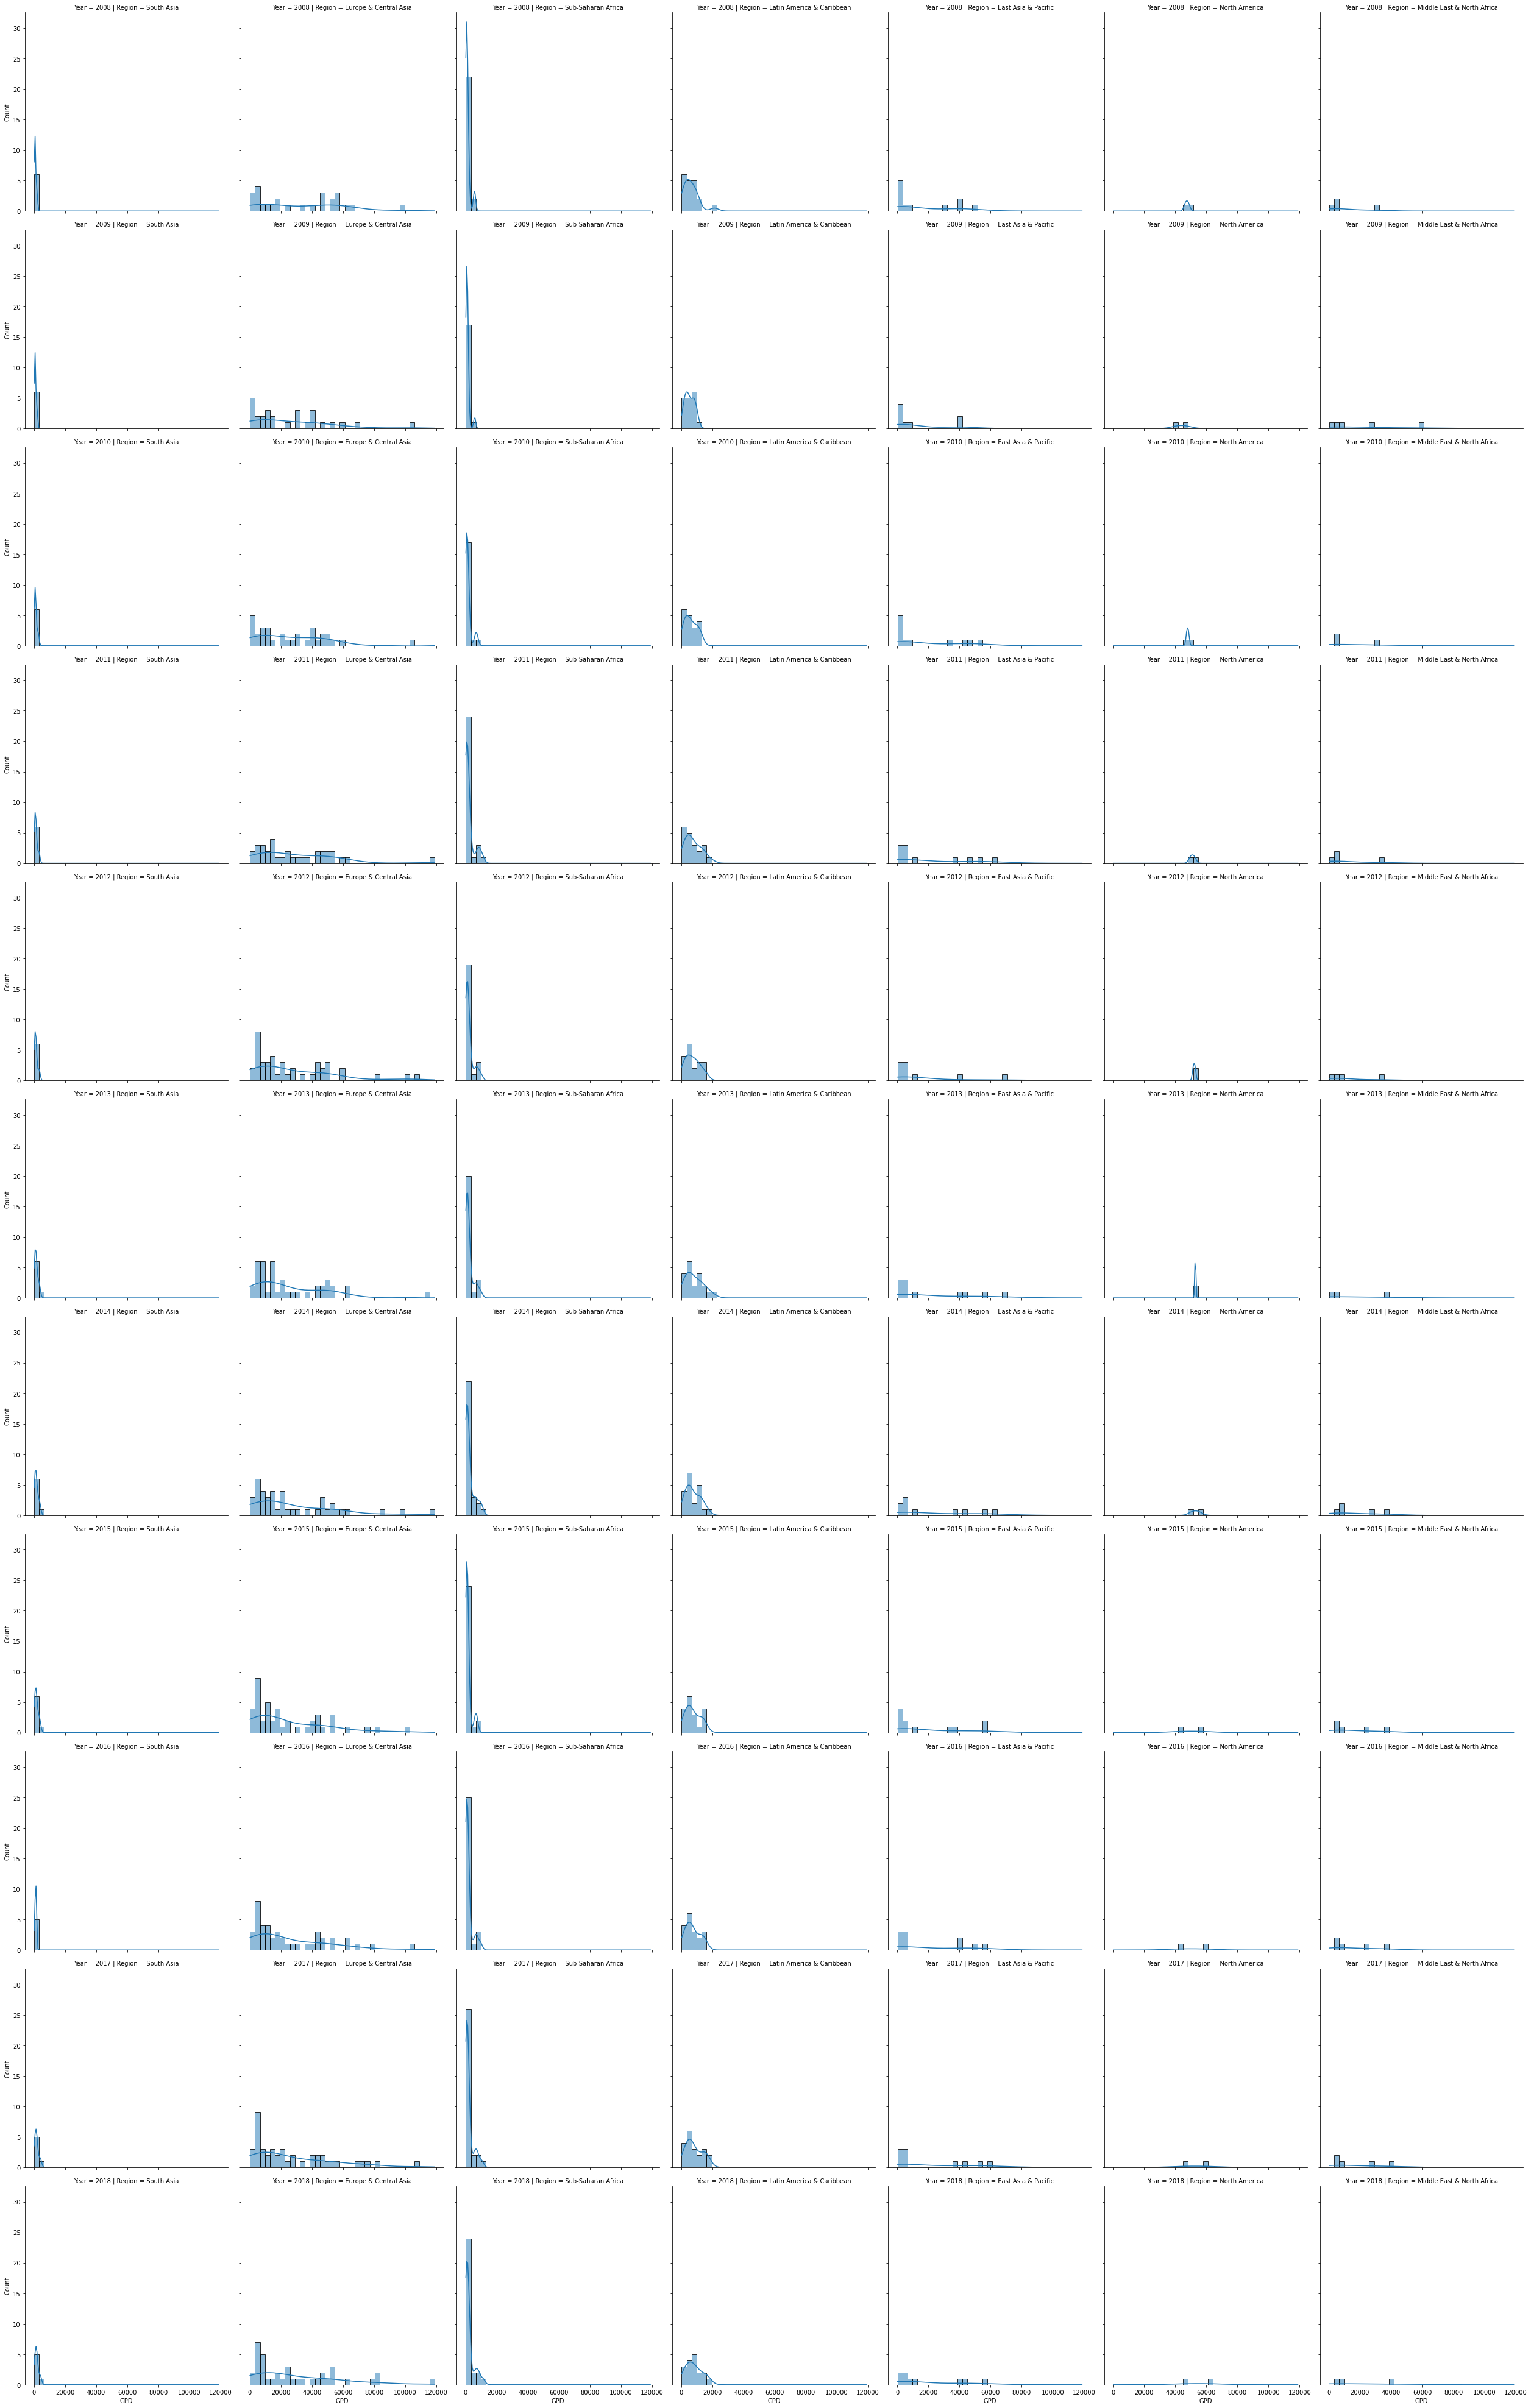

In [25]:
sns.displot(result, x="GPD", kde=True, col="Region", row="Year")

## Analyse des différents indices par rapport au PIB par habitants

### Par rapport à la région

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


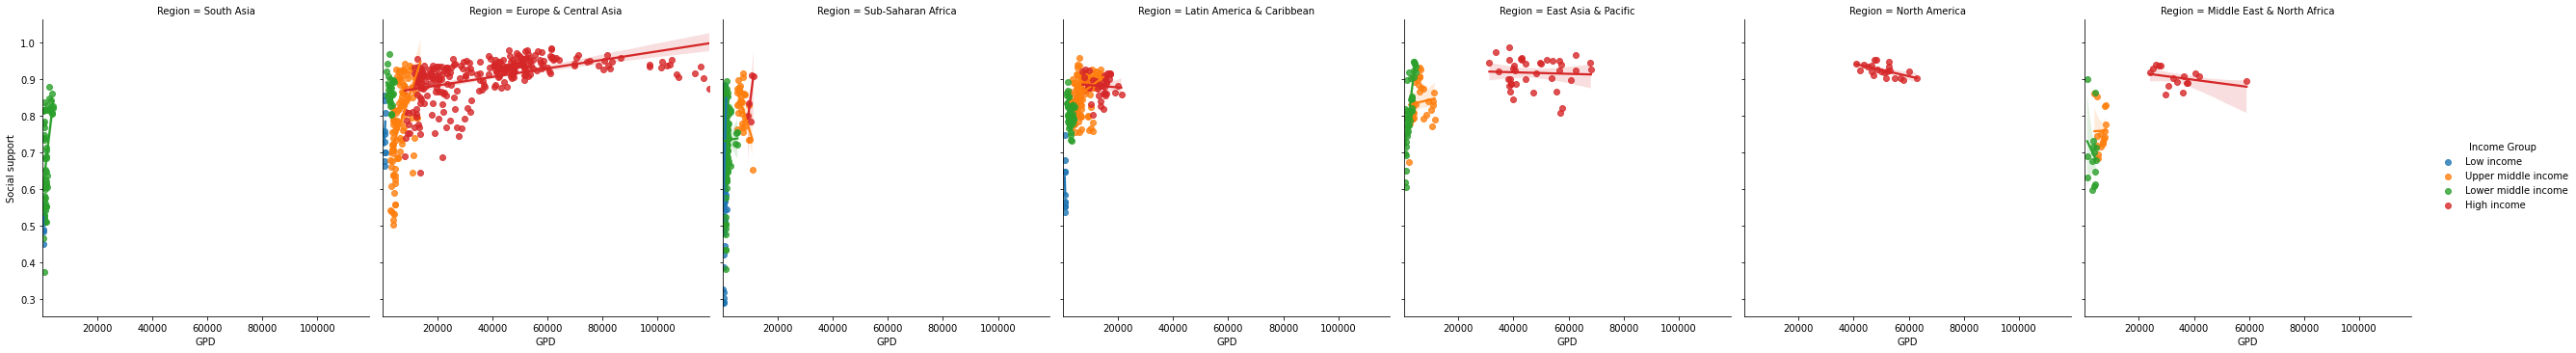

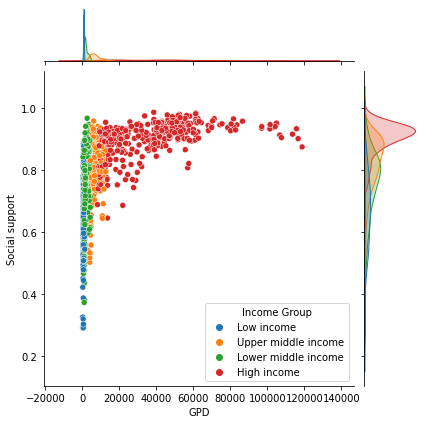

In [26]:
sns.lmplot('GPD', 'Social support', hue="Income Group", col="Region", data=result, fit_reg=True)
sns.jointplot(x="GPD", y="Social support", hue="Income Group", data=result);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

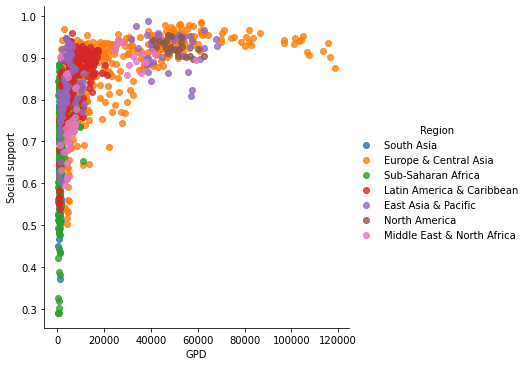

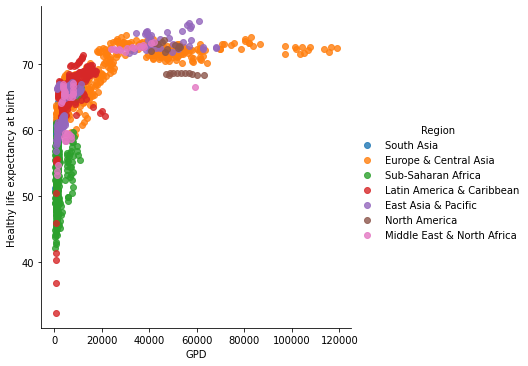

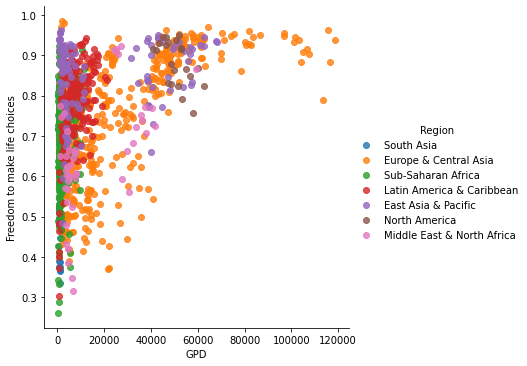

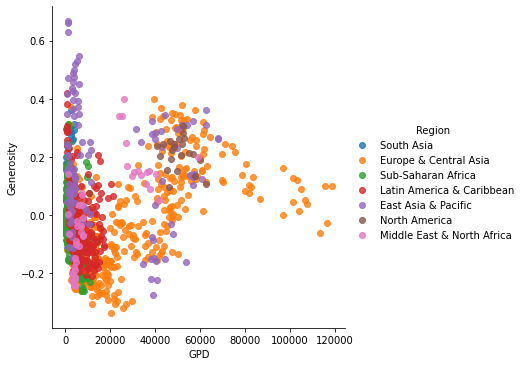

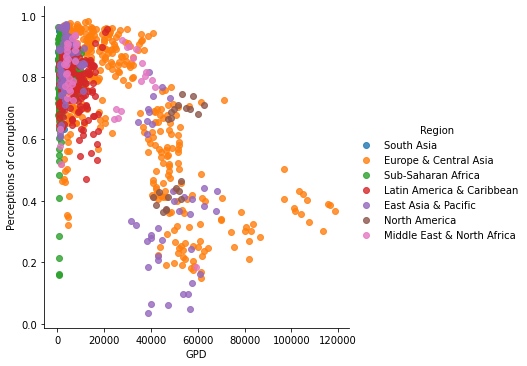

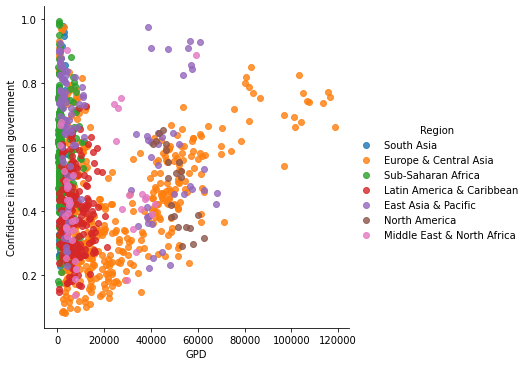

In [27]:
diff_hue = ['Region']

for i in result:
  if i != 'Year' and i != 'GPD' and i != 'Region' and i != 'Income Group':
    for j in diff_hue:
      sns.lmplot('GPD', i, hue=j, data=result, fit_reg=False)


### Par rapport au groupe de revenu

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

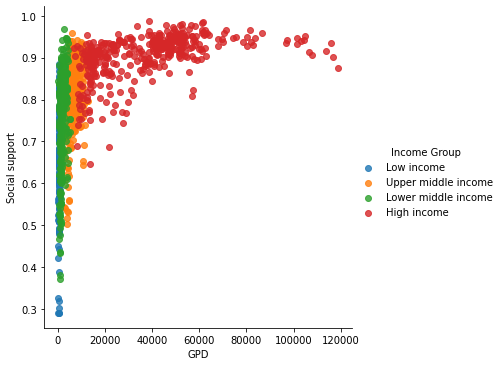

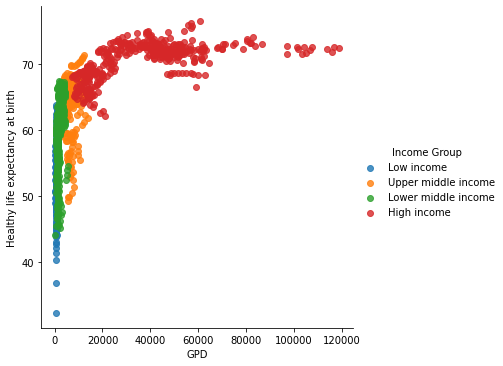

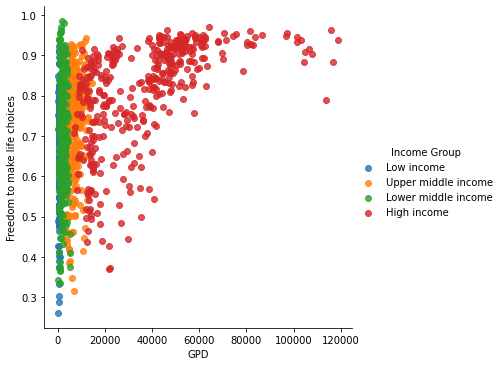

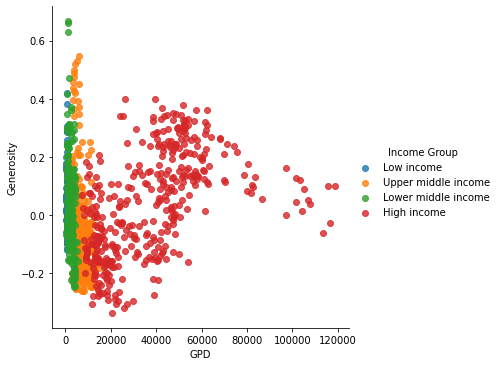

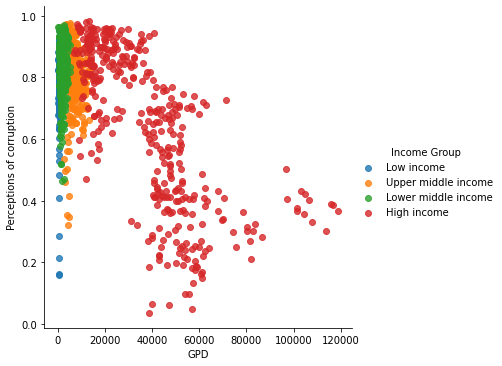

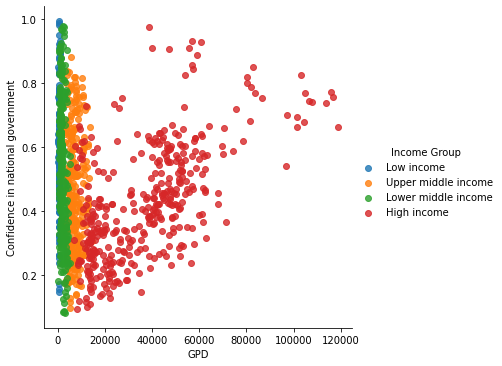

In [28]:
diff_hue = ['Income Group']

for i in result:
  if i != 'Year' and i != 'GPD' and i != 'Region' and i != 'Income Group':
    for j in diff_hue:
      sns.lmplot('GPD', i, hue=j, data=result, fit_reg=False)


### Par rapport aux années

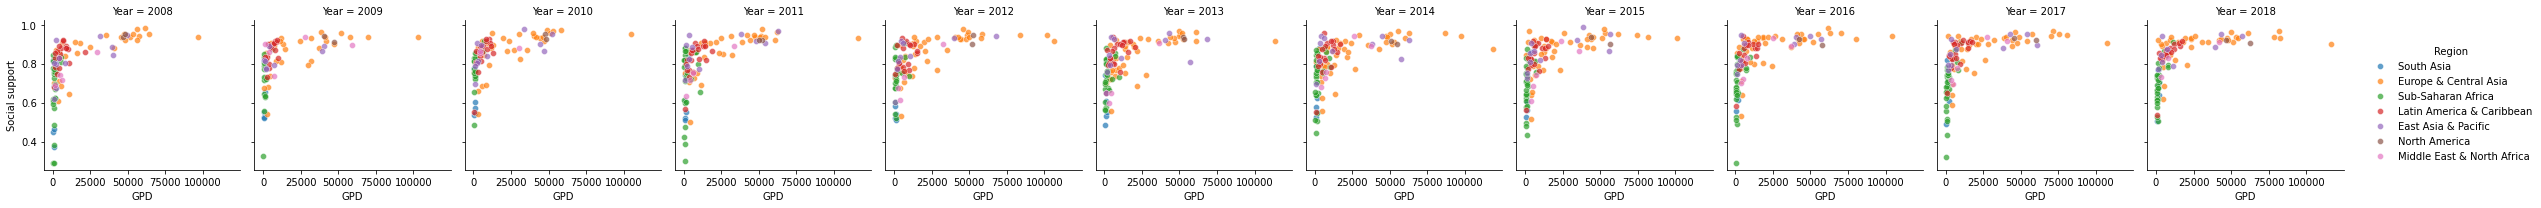

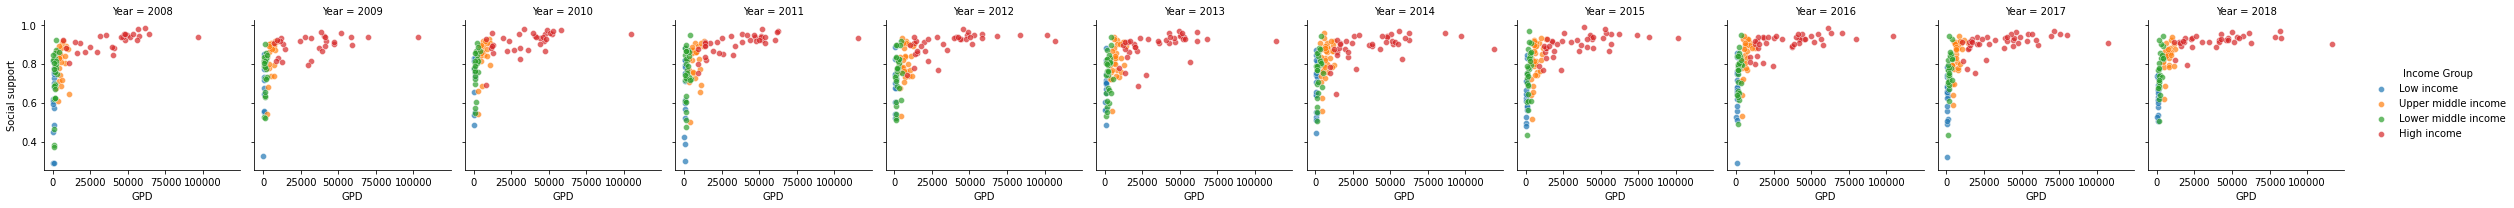

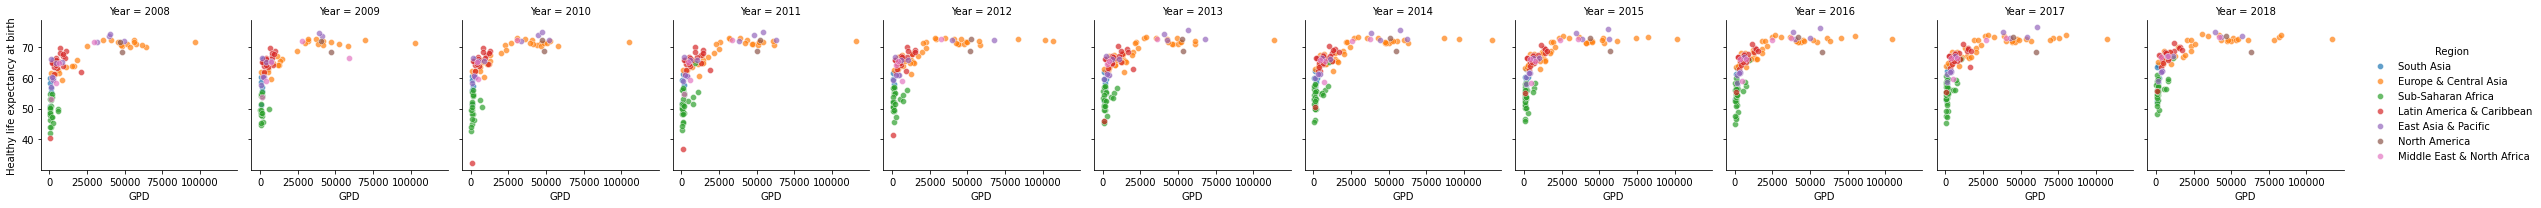

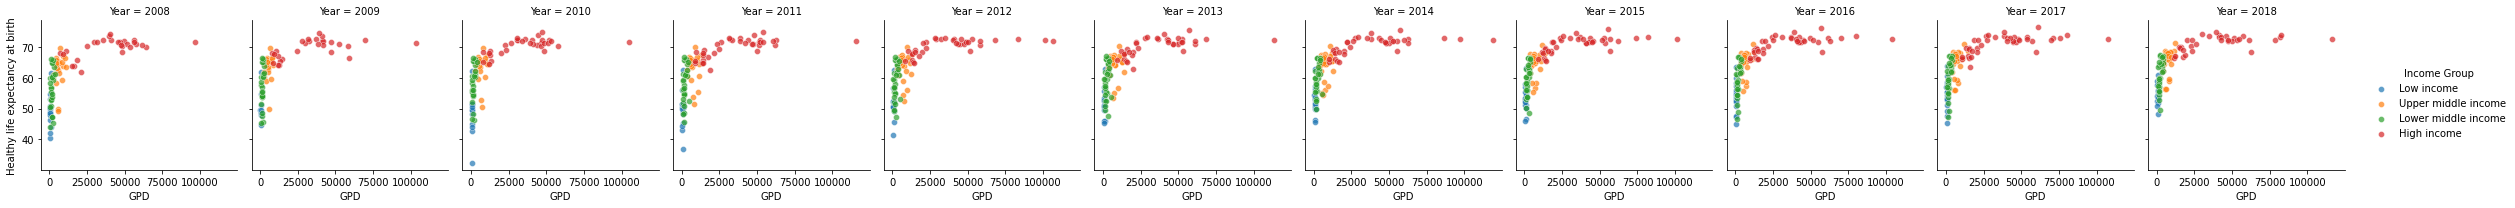

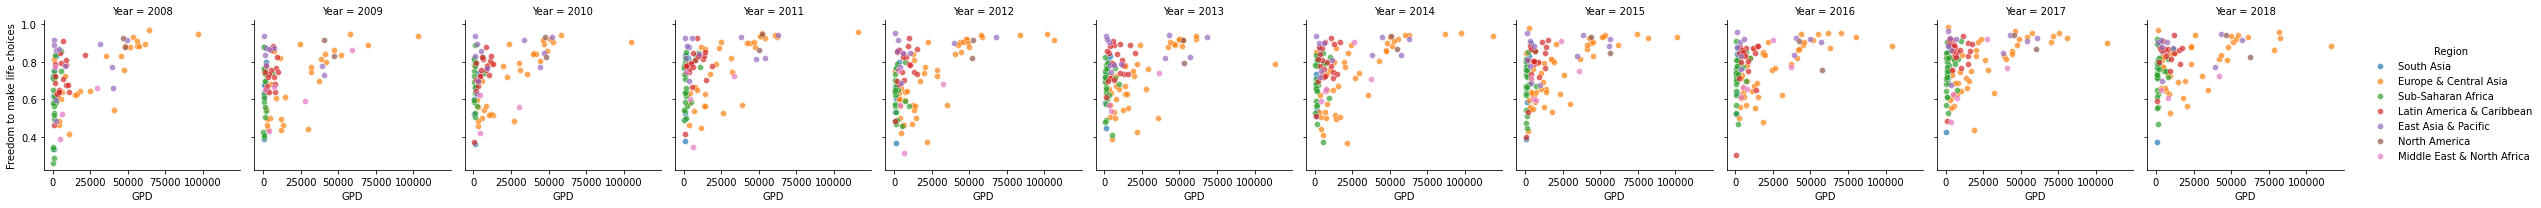

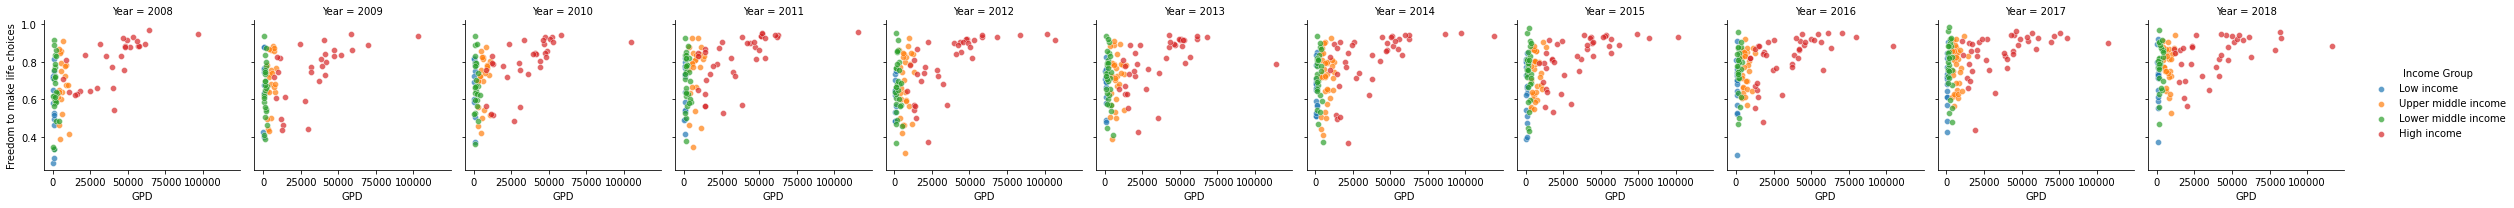

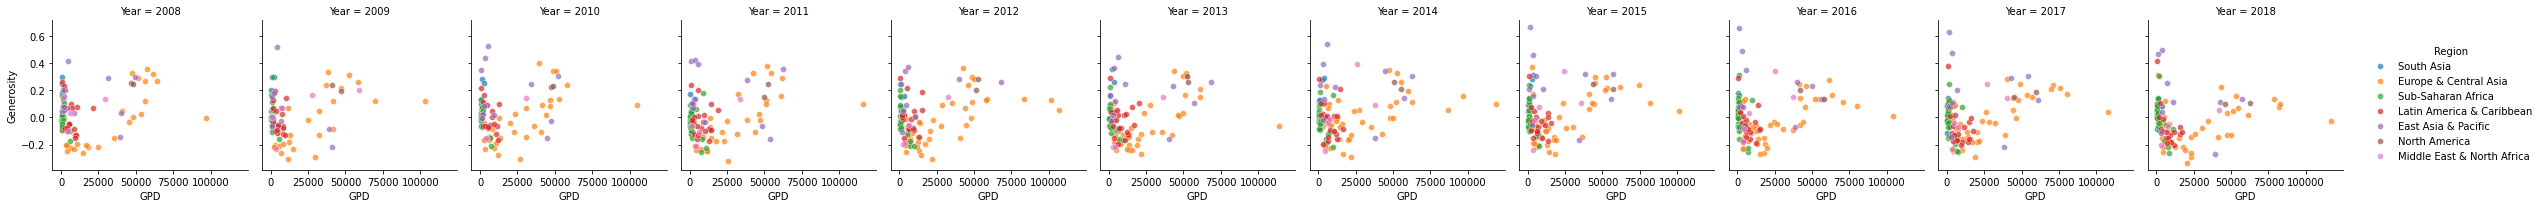

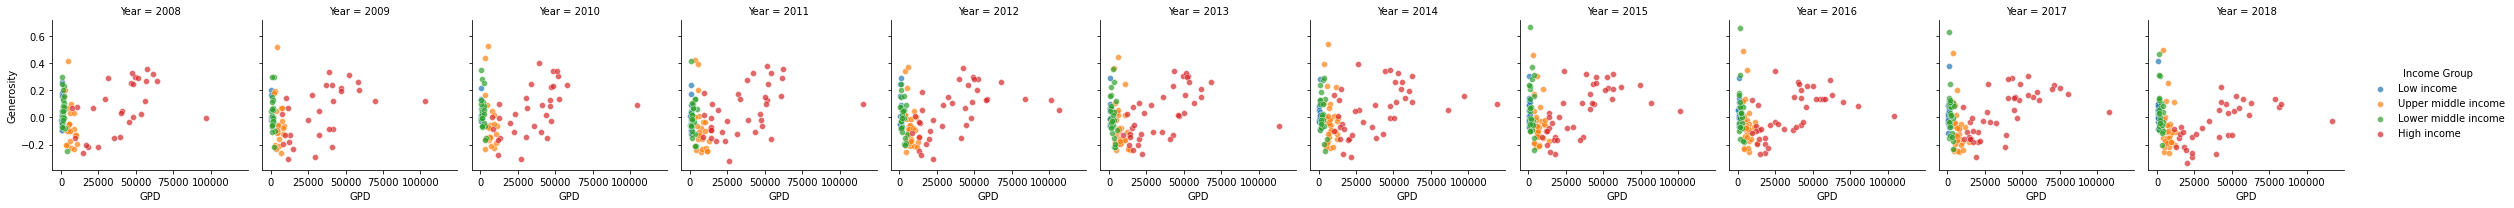

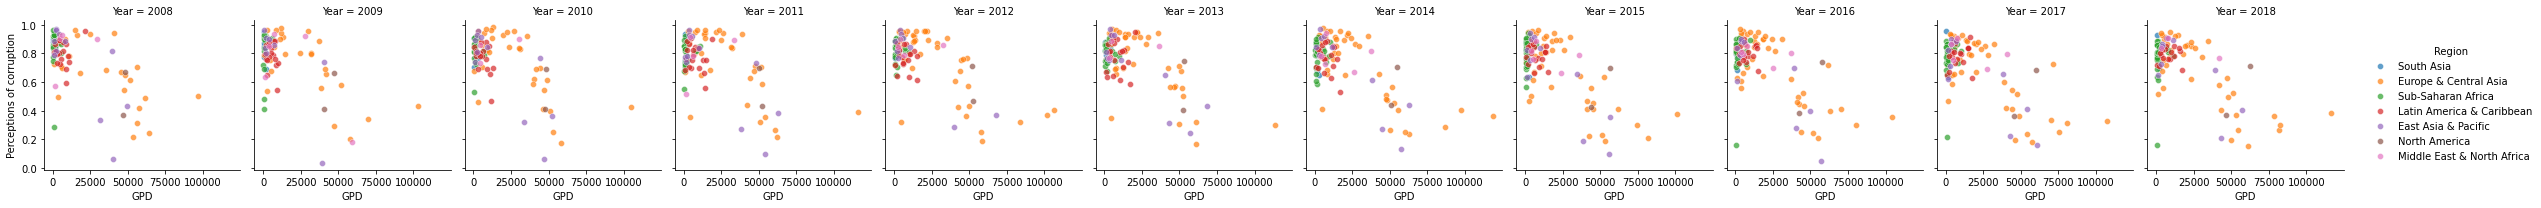

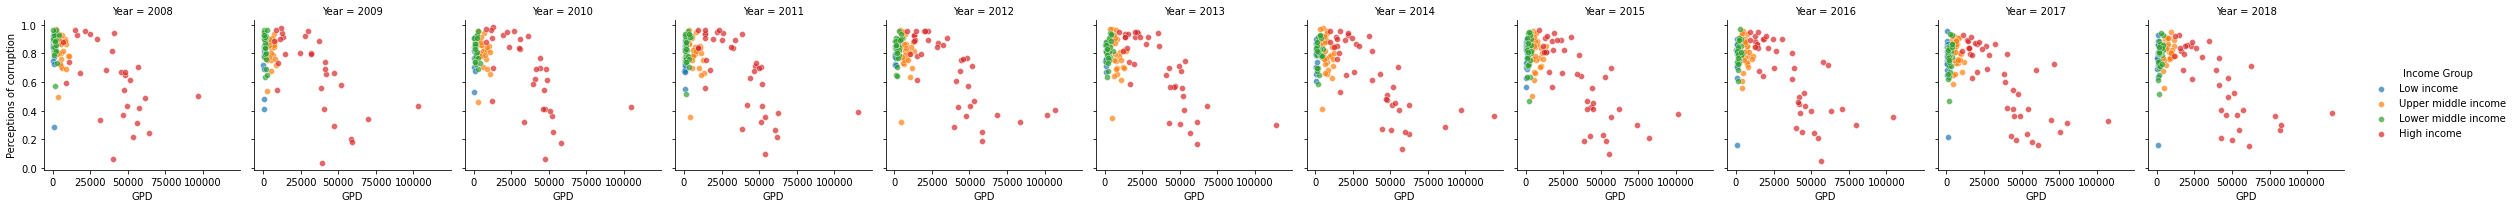

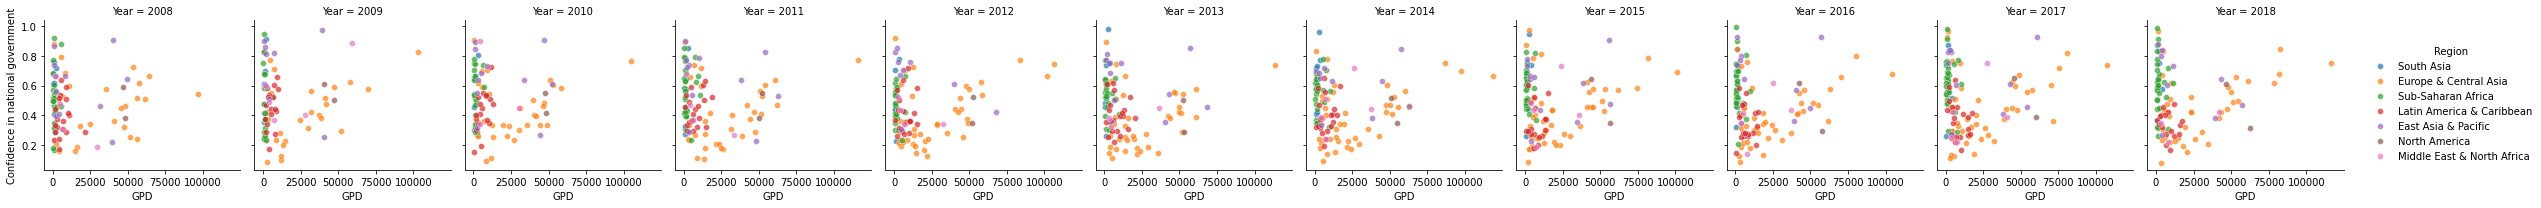

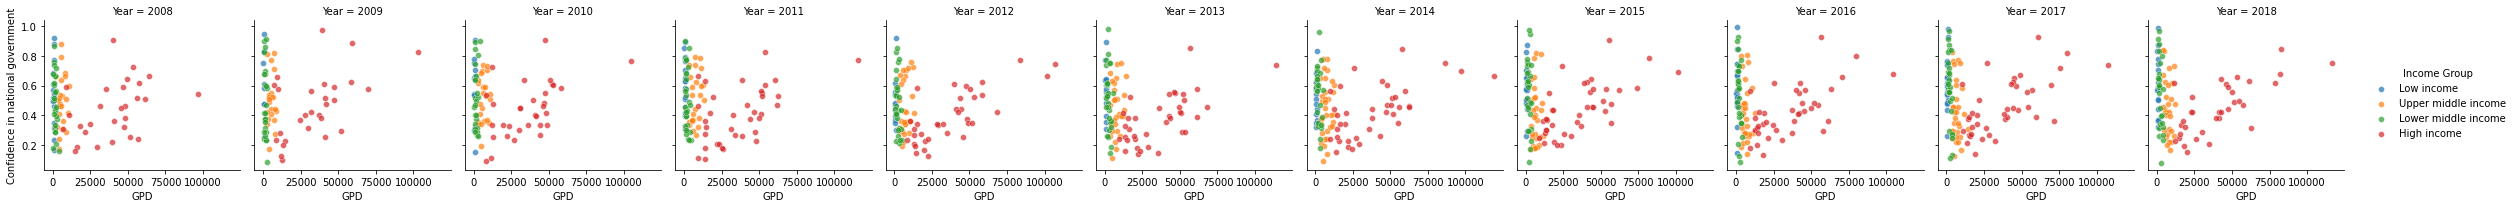

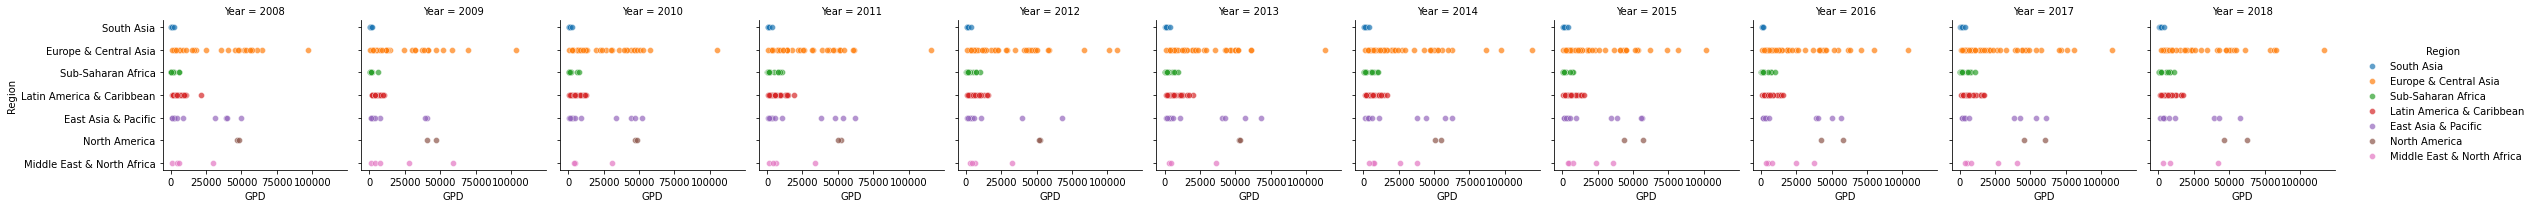

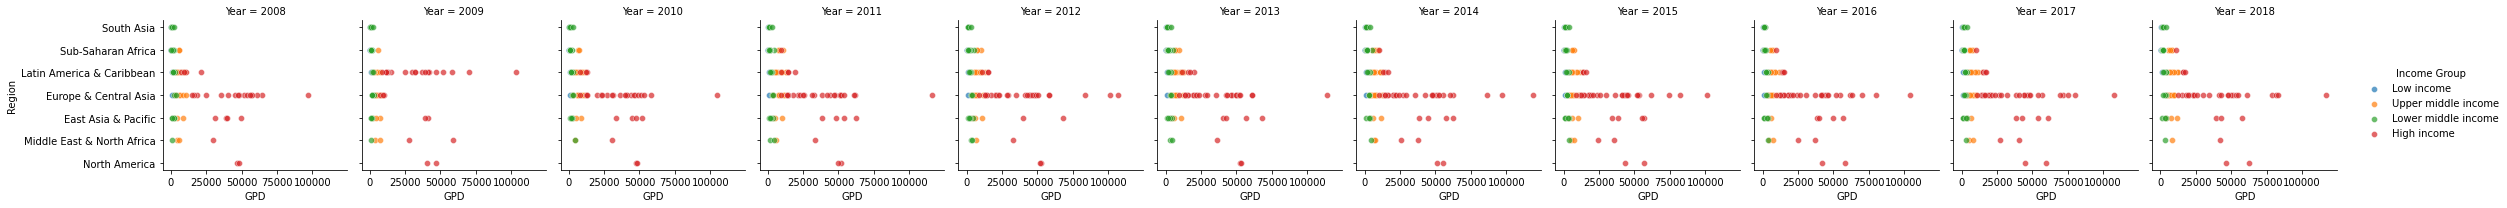

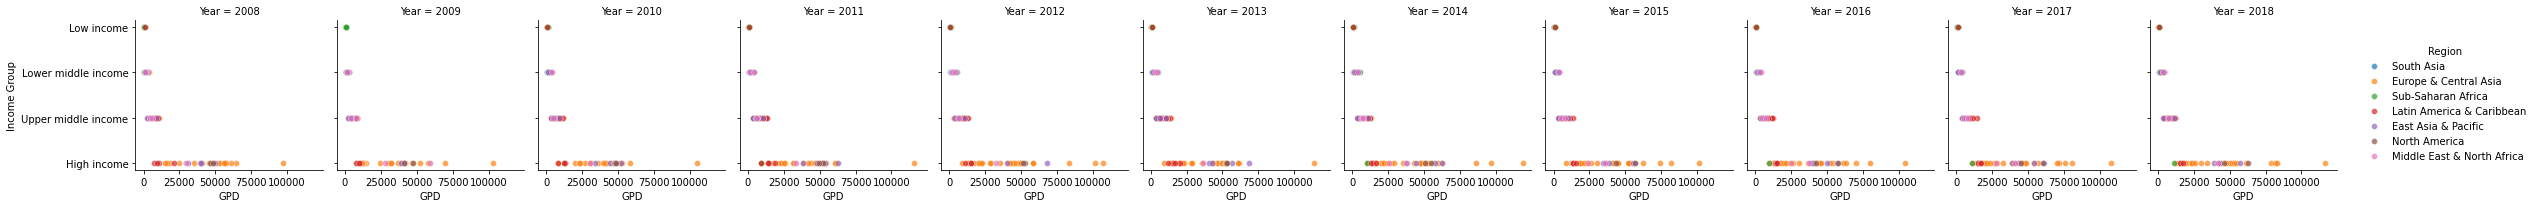

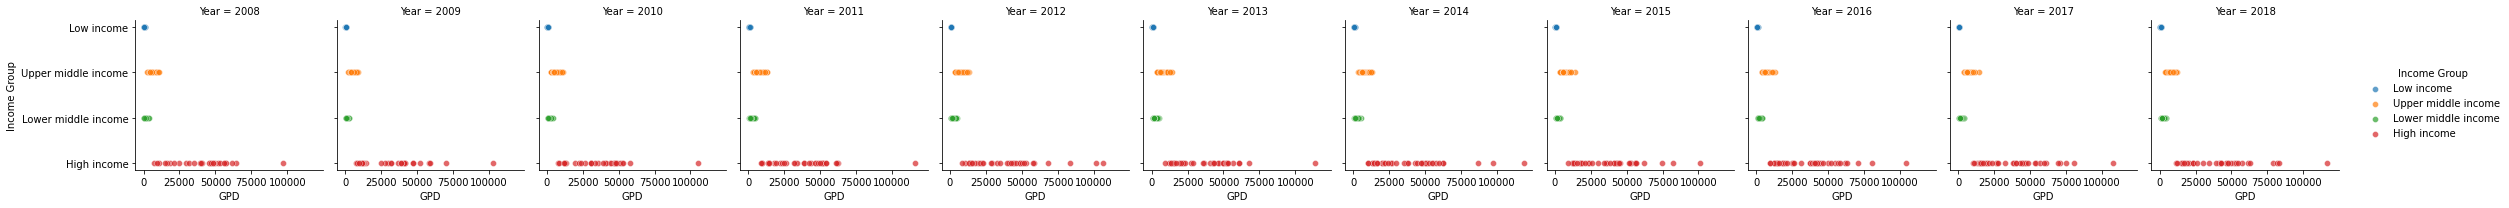

In [29]:
diff_hue = ['Region', 'Income Group']

for i in result:
  if i is not 'Year' and i is not 'GPD':
    for j in diff_hue:
      g = sns.FacetGrid(result, col="Year", hue=j)
      g.map(sns.scatterplot, "GPD", i, alpha=.7)
      g.add_legend()

# Construction d'un *Model*

In [30]:
y = result["Healthy life expectancy at birth"]
X = result[["GPD", "Year"]]

# Split into test and training sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

In [31]:
X_train = X_train.dropna()
X_test = X_test.dropna()

In [32]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))
y_train = y_train.astype('int')
y_test = y_test.astype('int')

[197 236 125   9 281 367 323 361  65 360 308 461 439 252 355 413 204 471
 195 483 354 436 219 444  80 434 445 457 451 470 230 342 463  48 368 251
  92 176 151 360 253  19  60 190 465 453  86 301 270 338  53 265 122  97
 211 292 172 211 159 475 296 139 456 392  47 286 346  48 218 463 357 353
 437 319 232 308 292 387 394 335 411 111 372 428 340 278 429 255 222 160
 132 362 439 408   8 102 228 468 425 422 428  33 439 439  14  94 410 256
   1 374 137 366 193 324 156 106  22 389 147 258 417 145 429 459 363 135
  44 480 317  27 183 291 344 273 455 317 324 127 415 134 401 289 189 264
  16 303 317  38  35  88 474 387 110 347 336 320 382 368 277 340 339  78
 214 140 100  74 381 242 351 185 292 477 160 282 269  70 135 226 364 412
 468 290 400 435 288 295 165 485 417 231 389  18 368 277 105 257 396  45
 390 162 155 126 179 186 328 191 246 192 184 322 468 456 144 295 437 146
  26  21 161 307 470 305 178 123 263 317 257  20  47 115   0 114 332 323
 184  36 287 116 399 311 269 174 434 308 179 431  2

In [33]:
X_train

,GPD,Year
Country Name,,
Kazakhstan,12386.700003,2012
El Salvador,2933.395675,2008
Senegal,1317.235687,2009
Chad,800.464225,2009
Honduras,1789.706651,2009
...,...,...
Sierra Leone,716.835305,2013
Central African Republic,551.750097,2011
Iraq,6836.027313,2012


In [34]:
X_test

,GPD,Year
Country Name,,
South Africa,6374.028196,2018
Romania,9567.129345,2016
Indonesia,3491.624791,2014
New Zealand,44553.282211,2014
Belgium,46744.662544,2013
...,...,...
Malawi,380.597033,2015
Kenya,902.070026,2008
Bangladesh,981.839879,2013


In [35]:
model = DecisionTreeClassifier()

In [36]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.1693121693121693
